# Linear Regression Machine Learning Algorithm

# Objective 

**Ecommerce company based in New York City that sells clothing online but they also have in-store style and clothing advice sessions. Customers come in to the store, have sessions/meetings with a personal stylist, then they can go home and order either on a mobile app or website for the clothes they want.**
. 

**The company is trying to decide whether to focus their efforts on their mobile app experience or their website.**

*Importing Libraries*

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

*Loading data*

In [2]:
customers = pd.read_csv("Ecommerce Customers")

In [3]:
customers.head()

,Email,Address,Avatar,Avg. Session Length,Time on App,Time on Website,Length of Membership,Yearly Amount Spent
0,mstephenson@fernandez.com,"835 Frank Tunnel\nWrightmouth, MI 82180-9605",Violet,34.497268,12.655651,39.577668,4.082621,587.951054
1,hduke@hotmail.com,"4547 Archer Common\nDiazchester, CA 06566-8576",DarkGreen,31.926272,11.109461,37.268959,2.664034,392.204933
2,pallen@yahoo.com,"24645 Valerie Unions Suite 582\nCobbborough, D...",Bisque,33.000915,11.330278,37.110597,4.104543,487.547505
3,riverarebecca@gmail.com,"1414 David Throughway\nPort Jason, OH 22070-1220",SaddleBrown,34.305557,13.717514,36.721283,3.120179,581.852344
4,mstephens@davidson-herman.com,"14023 Rodriguez Passage\nPort Jacobville, PR 3...",MediumAquaMarine,33.330673,12.795189,37.536653,4.446308,599.406092


In [4]:
customers.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 8 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Email                 500 non-null    object 
 1   Address               500 non-null    object 
 2   Avatar                500 non-null    object 
 3   Avg. Session Length   500 non-null    float64
 4   Time on App           500 non-null    float64
 5   Time on Website       500 non-null    float64
 6   Length of Membership  500 non-null    float64
 7   Yearly Amount Spent   500 non-null    float64
dtypes: float64(5), object(3)
memory usage: 31.4+ KB


*Exploratory Data Analysis*

In [5]:
sns.set_palette("cubehelix")
sns.set_style('whitegrid')

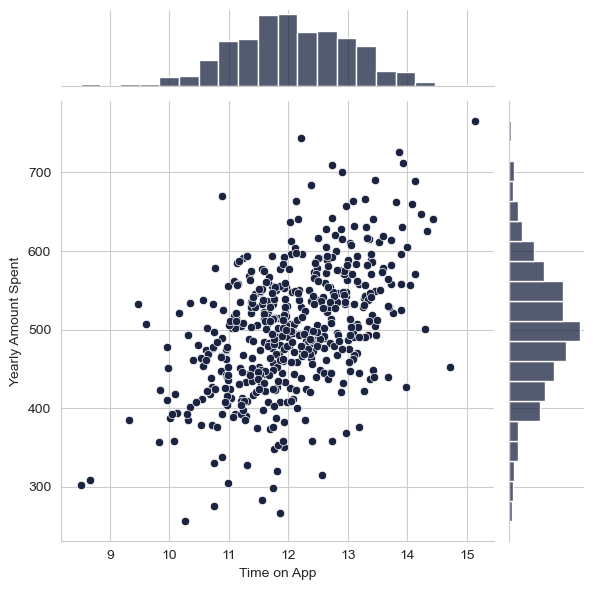

In [6]:
sns.jointplot(data = customers,x='Time on App' , y='Yearly Amount Spent')

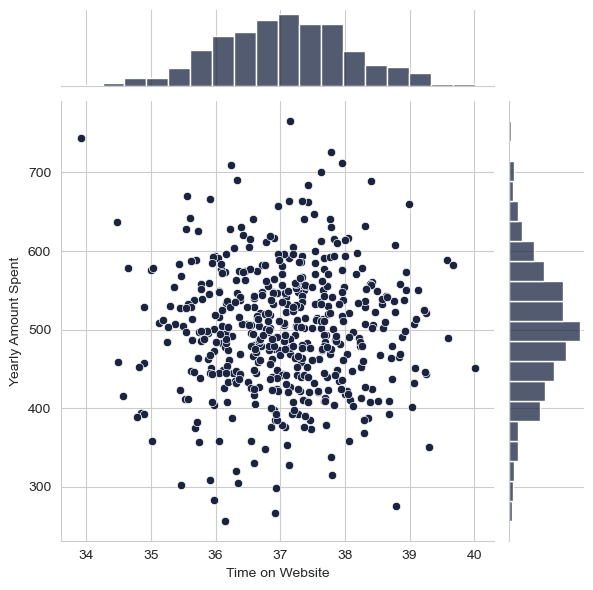

In [7]:
sns.jointplot(data = customers,x='Time on Website',y='Yearly Amount Spent')

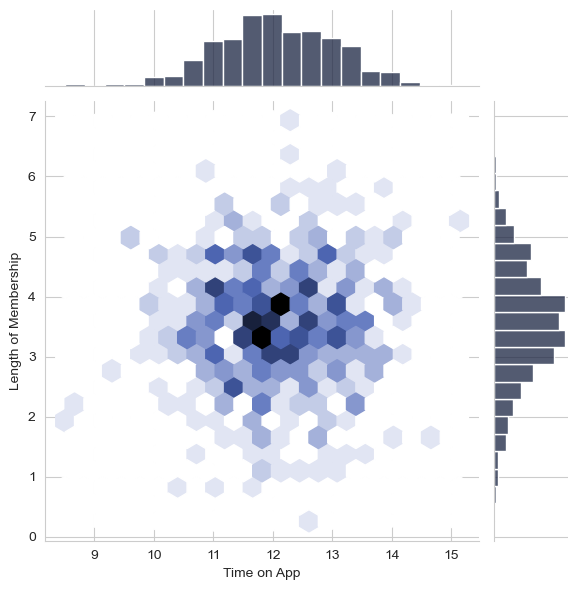

In [8]:
sns.jointplot(data = customers, x='Time on App',y='Length of Membership',kind='hex')

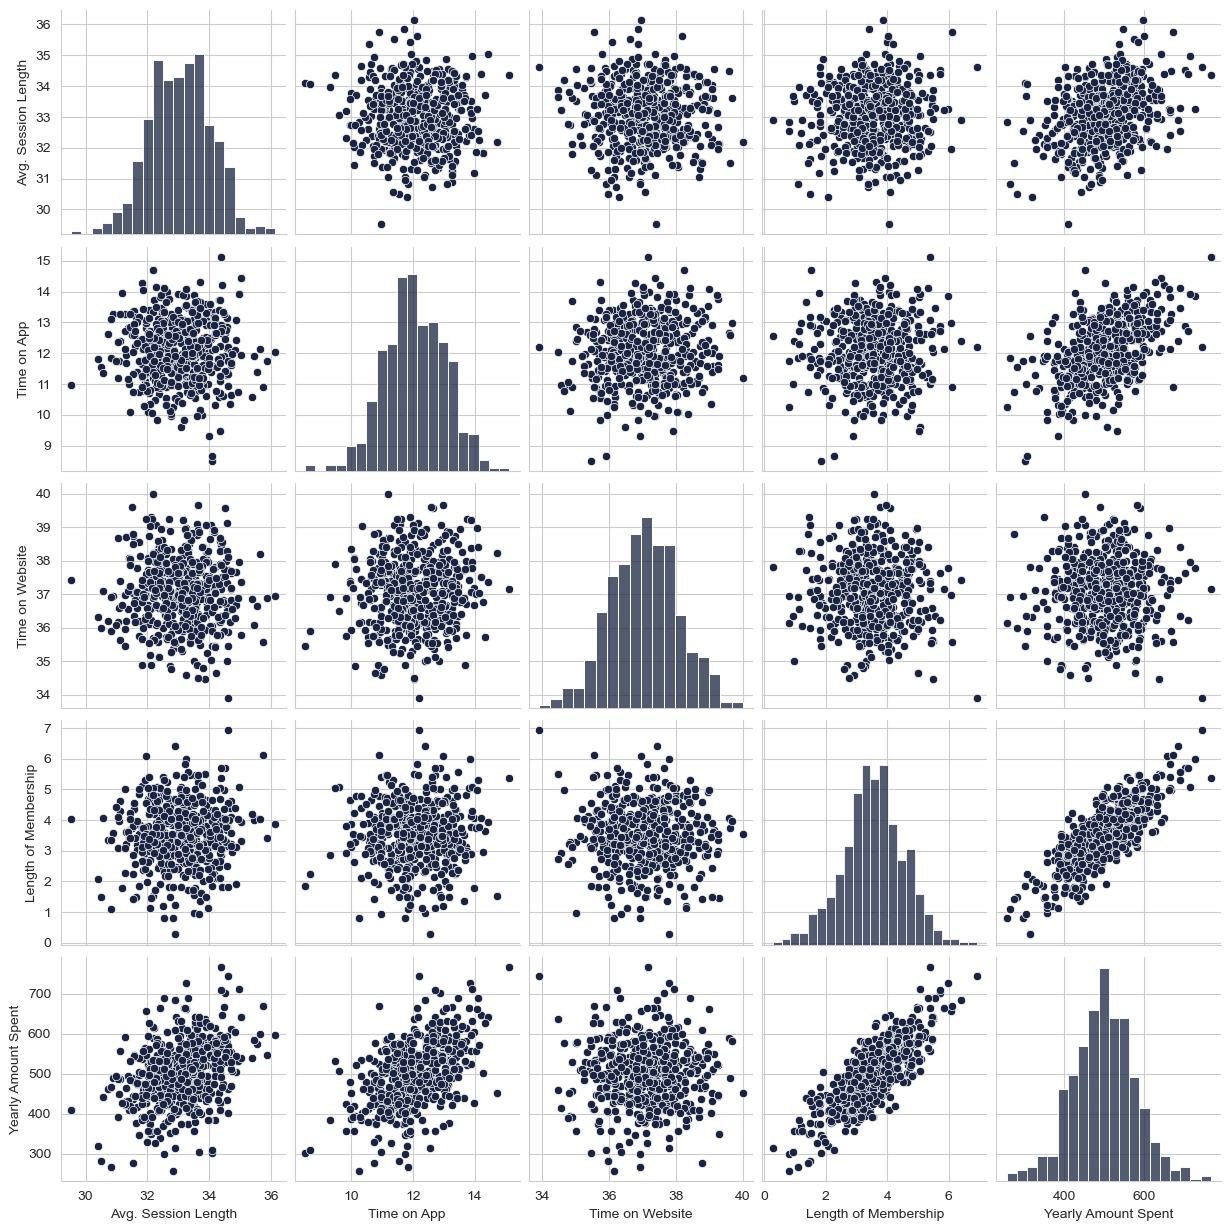

In [9]:
sns.pairplot(customers)

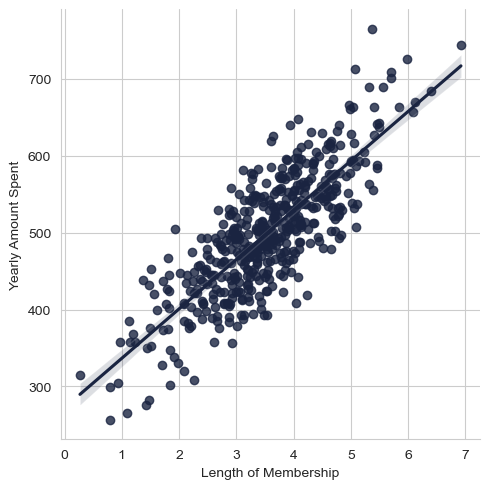

In [10]:
sns.lmplot(data=customers, x = 'Length of Membership',y='Yearly Amount Spent')

# Spliting Data

In [11]:
X = customers[['Avg. Session Length', 'Time on App','Time on Website', 'Length of Membership']]

In [12]:
y = customers['Yearly Amount Spent']

In [14]:
X.head(1)

,Avg. Session Length,Time on App,Time on Website,Length of Membership
0,34.497268,12.655651,39.577668,4.082621


In [15]:
y.head(1)

0    587.951054
Name: Yearly Amount Spent, dtype: float64

In [17]:
from sklearn.model_selection import train_test_split

In [18]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=42)

In [24]:
customers.shape

(500, 8)

In [25]:
X_test.shape

(150, 4)

In [26]:
X_train.shape

(350, 4)

# Implimenting Linear Regression Model 

In [27]:
from sklearn.linear_model import LinearRegression

In [28]:
model = LinearRegression()

In [29]:
model.fit(X_train,y_train)

LinearRegression()

# Prediction Graph

In [30]:
predictioins = model.predict(X_test)

Text(0, 0.5, 'Predictions')

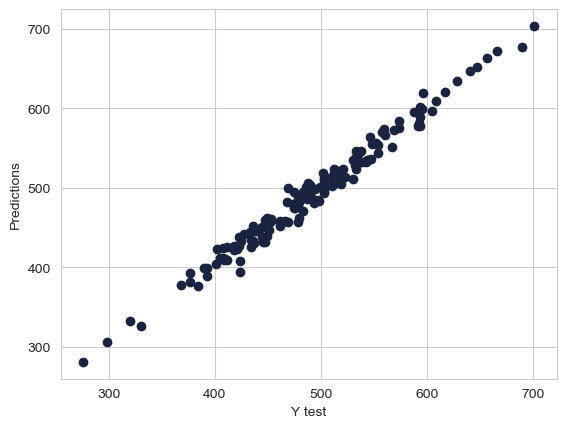

In [35]:
plt.scatter(y_test,predictioins)
plt.xlabel('Y test')
plt.ylabel('Predictions')

*interpret the coefficients at all to get an idea.*

In [43]:
coeffecients = pd.DataFrame(model.coef_,X.columns)
coeffecients.columns = ['Coeffecient']
coeffecients

,Coeffecient
Avg. Session Length,25.724256
Time on App,38.597135
Time on Website,0.459148
Length of Membership,61.674732


Above interpreting the coefficients means:

- Holding all other features fixed, a 1 unit increase in **Avg. Session Length** is associated with an **increase of 25.98 total dollars spent**.
- Holding all other features fixed, a 1 unit increase in **Time on App** is associated with an **increase of 38.59 total dollars spent**.
- Holding all other features fixed, a 1 unit increase in **Time on Website** is associated with an **increase of 0.19 total dollars spent**.
- Holding all other features fixed, a 1 unit increase in **Length of Membership** is

## Final Prediction

**So according to our prediction company should focus more on mobile app**